In [1]:
from msp_sim import *
from tree_LD_analysis import *
import numpy as np 
import msprime as msprime 
import pandas as pd
import tskit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import seaborn.objects as so

# Proof of concept: configuration probabilities depend on the number of samples.

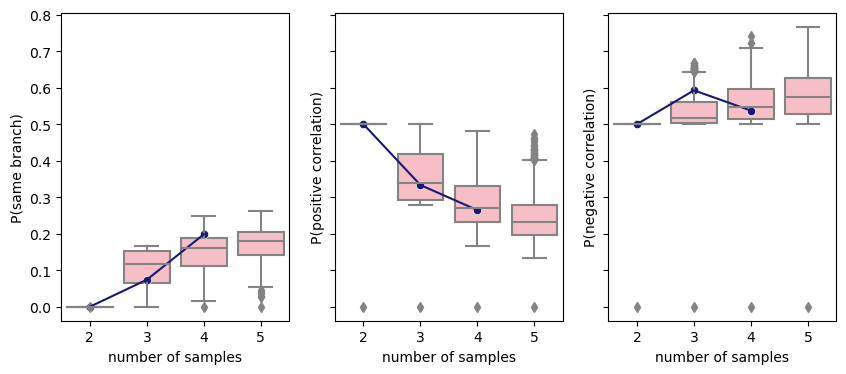

In [23]:
N=10_000
# number of samples
num_samples_toplot=[2,3,4,5]
# df to hold results
df=pd.DataFrame()
# iterate through, simulate and get MC estimates of probabilities
for num_samples in num_samples_toplot:
    probs=np.empty((1,3))
    for it in range(1000):
        ts = msprime.sim_ancestry(
                samples=100,
                population_size=N,
                sequence_length=1_000,
                recombination_rate=0)
        # mutate the tree
        ts = msprime.sim_mutations(ts, rate=0) 
        # Sample s random numbers from the interval [0, 100]
        samples = random.sample(range(0,100), num_samples)
        # subsample individuals
        subsampled_ts=ts.simplify(samples)
        # get first tree
        tree=subsampled_ts.first()
        # get probabilities
        config_probs=get_configuration_probabilities(tree)
        probs=np.vstack([probs,config_probs]) 
    # bookkeeping
    res=pd.DataFrame({"sb":probs[:,0],
        "os":probs[:,1],
        "ss":probs[:,2],
        "num_samples":num_samples})
    df=pd.concat([df,res])

# plot simulation results
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
sns.boxplot(ax=axes[0],data=df, x="num_samples", y="ss",color="lightpink")
sns.boxplot(ax=axes[1],data=df, x="num_samples", y="sb",color="lightpink")
sns.boxplot(ax=axes[2],data=df, x="num_samples", y="os",color="lightpink")

# my first order approximations
approx=pd.DataFrame({"num_samples":[0,1,2],
                     "sb":[1/2,1/3,32/121],
                    "os":[1/2,16/27,65/121],
                    "ss":[0,2/27,24/121]})
sns.scatterplot(ax=axes[0],data=approx, x="num_samples", y="ss",color="midnightblue")
sns.scatterplot(ax=axes[1],data=approx, x="num_samples", y="sb",color="midnightblue")
sns.scatterplot(ax=axes[2],data=approx, x="num_samples", y="os",color="midnightblue")
sns.lineplot(ax=axes[0],data=approx, x="num_samples", y="ss",color="midnightblue")
sns.lineplot(ax=axes[1],data=approx, x="num_samples", y="sb",color="midnightblue")
sns.lineplot(ax=axes[2],data=approx, x="num_samples", y="os",color="midnightblue")
axes[0].set(xlabel='number of samples')
axes[1].set(xlabel='number of samples')
axes[2].set(xlabel='number of samples')
axes[0].set(ylabel='P(same branch)')
axes[1].set(ylabel='P(positive correlation)')
axes[2].set(ylabel='P(negative correlation)')
plt.savefig('sample_size_configs_withprobs.pdf')

In [2]:
N=10_000
# number of samples
num_samples_toplot=np.arange(10,500,50)
# df to hold results
df=pd.DataFrame()
# iterate through, simulate and get MC estimates of probabilities
for num_samples in num_samples_toplot:
    probs=np.empty((1,3))
    for it in range(100):
        ts = msprime.sim_ancestry(
                samples=500,
                population_size=N,
                sequence_length=1_000,
                recombination_rate=0)
        # mutate the tree
        ts = msprime.sim_mutations(ts, rate=0) 
        # Sample s random numbers from the interval [0, 100]
        samples = random.sample(range(0,500), num_samples)
        # subsample individuals
        subsampled_ts=ts.simplify(samples)
        # get first tree
        tree=subsampled_ts.first()
        # get probabilities
        config_probs=get_configuration_probabilities(tree)
        probs=np.vstack([probs,config_probs]) 
    # bookkeeping
    res=pd.DataFrame({"sb":probs[:,0],
        "os":probs[:,1],
        "ss":probs[:,2],
        "num_samples":num_samples})
    df=pd.concat([df,res])

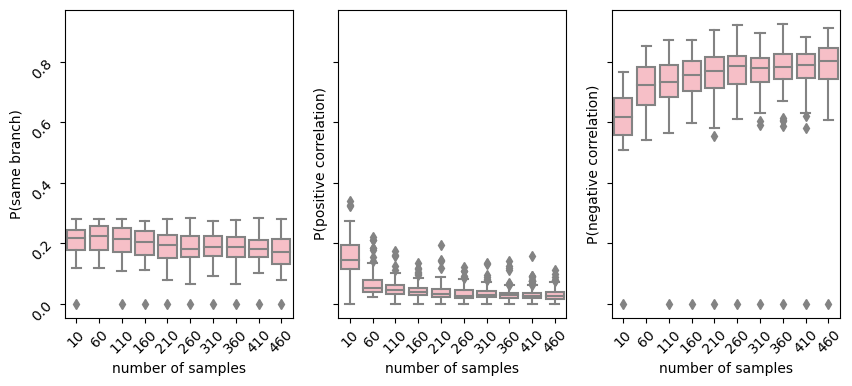

In [19]:
# plot simulation results
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
sns.boxplot(ax=axes[0],data=df, x="num_samples", y="ss",color="lightpink")
sns.boxplot(ax=axes[1],data=df, x="num_samples", y="sb",color="lightpink")
sns.boxplot(ax=axes[2],data=df, x="num_samples", y="os",color="lightpink")
axes[0].set(xlabel='number of samples')
axes[1].set(xlabel='number of samples')
axes[2].set(xlabel='number of samples')
axes[0].set(ylabel='P(same branch)')
axes[1].set(ylabel='P(positive correlation)')
axes[2].set(ylabel='P(negative correlation)')
axes[0].tick_params(labelrotation=45)
axes[1].tick_params(labelrotation=45)
axes[2].tick_params(labelrotation=45)
plt.savefig('sample_size_configs.pdf')